In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

data_sets = []  # placeholder list
datalist = pickle.load(open("raw_data.pickle", "rb"))  # load data from first step

leagues = ['epl', 'la_liga', 'bundesliga', 'serie_a', 'ligue_1', 'rfpl']  # list of all leagues

# main loop through every league to create one single dataset and remove duplicated matches
for i in range(0, len(datalist)):

    df = datalist[i]
    df = pd.concat(df)
    df['league'] = leagues[i]
    df['match_id']=df['team_h']+ df['team_a']  # creating unique match id with the team names
    df['match_id'] = [''.join(sorted(s)) for s in df['match_id']]
    df = df.drop_duplicates(['match_id','datetime'])  # removing duplicated fields if both match id (playing teams) and timestamp are identical
    df = df.dropna()  # remove NAs
    df = df.reset_index(drop=True)
    
    data_sets.append(df)  # clean data from every season and append to new list

# merge data
data = pd.concat(data_sets)

In [2]:
# Get shape of dataset

data.shape

(13853, 44)

In [3]:
# Describing the dataset

data.describe()

,goals_h,goals_a,xG_h,xG_a,h_forecast_w,h_forecast_d,h_forecast_l,shots_h,shots_a,yellow_card_h,...,xpts_a,pts_a,npxG_h,ppda_att_h,ppda_def_h,deep_h,xpts_h,pts_h,elo_h,elo_a
count,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,...,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000,13853.000000
mean,1.508915,1.178950,1.476906,1.152637,0.447480,0.241903,0.310615,13.730672,11.223273,1.897206,...,1.173748,1.161337,1.338405,237.321302,25.014798,6.438750,1.584344,1.585577,1490.796304,1494.658844
std,1.306599,1.152825,0.885260,0.767695,0.283574,0.111346,0.260603,5.273697,4.669162,1.322074,...,0.789893,1.276422,0.815276,83.262398,7.172355,4.296018,0.813286,1.317813,131.441556,131.447553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,47.000000,4.000000,0.000000,0.000300,0.000000,1138.167883,1147.444700
25%,1.000000,0.000000,0.818975,0.575886,0.198300,0.166500,0.088900,10.000000,8.000000,1.000000,...,0.505800,0.000000,0.737979,177.000000,20.000000,3.000000,0.914100,0.000000,1401.379862,1405.299680
50%,1.000000,1.000000,1.319560,1.003800,0.427300,0.251200,0.239600,13.000000,11.000000,2.000000,...,1.054200,1.000000,1.182800,229.000000,24.000000,6.000000,1.612200,1.000000,1474.781373,1478.263238
75%,2.000000,2.000000,1.968160,1.564340,0.680500,0.311300,0.487400,17.000000,14.000000,3.000000,...,1.772000,3.000000,1.773270,288.000000,30.000000,9.000000,2.264700,3.000000,1565.940424,1570.687567
max,10.000000,9.000000,6.630490,6.186960,1.000000,0.859000,0.999700,47.000000,39.000000,8.000000,...,2.999400,3.000000,6.610910,633.000000,65.000000,42.000000,3.000000,3.000000,1957.502660,1958.810098


In [4]:
# Check if any NAs left

data.isna().sum()

id               0
isResult         0
datetime         0
team_h           0
team_a           0
id_h             0
id_a             0
goals_h          0
goals_a          0
xG_h             0
xG_a             0
h_forecast_w     0
h_forecast_d     0
h_forecast_l     0
shots_h          0
shots_a          0
yellow_card_h    0
yellow_card_a    0
red_card_h       0
red_card_a       0
key_passes_h     0
key_passes_a     0
xA_h             0
xA_a             0
xGChain_h        0
xGChain_a        0
xGBuildup_h      0
xGBuildup_a      0
npxG_a           0
ppda_att_a       0
ppda_def_a       0
deep_a           0
xpts_a           0
pts_a            0
npxG_h           0
ppda_att_h       0
ppda_def_h       0
deep_h           0
xpts_h           0
pts_h            0
elo_h            0
elo_a            0
league           0
match_id         0
dtype: int64

In [5]:
# Data preview

data.head()

,id,isResult,datetime,team_h,team_a,id_h,id_a,goals_h,goals_a,xG_h,...,npxG_h,ppda_att_h,ppda_def_h,deep_h,xpts_h,pts_h,elo_h,elo_a,league,match_id
0,4749,True,2014-08-16 12:45:00,Manchester United,Swansea,89,84,1,2,1.166350,...,1.166350,253,25,8,2.2359,0,1500.0,1500.0,epl,MSUaaacdeeeehinnnrssttw
1,4750,True,2014-08-16 15:00:00,Leicester,Everton,75,72,2,2,1.278300,...,1.278300,362,25,1,1.9461,1,1500.0,1500.0,epl,ELceeeeinorrsttv
2,4751,True,2014-08-16 15:00:00,Queens Park Rangers,Hull,202,91,0,1,1.900670,...,1.126890,218,17,1,2.0149,0,1500.0,1500.0,epl,HPQRaaeeegkllnnrrssuu
3,4752,True,2014-08-16 15:00:00,Stoke,Aston Villa,85,71,0,1,0.423368,...,0.423368,132,32,3,0.8041,0,1500.0,1500.0,epl,ASVaeikllnoostt
4,4753,True,2014-08-16 15:00:00,West Bromwich Albion,Sunderland,76,77,2,2,1.683430,...,0.922260,184,31,6,2.0358,1,1500.0,1500.0,epl,ABSWabcddeehiillmnnnoorrstuw


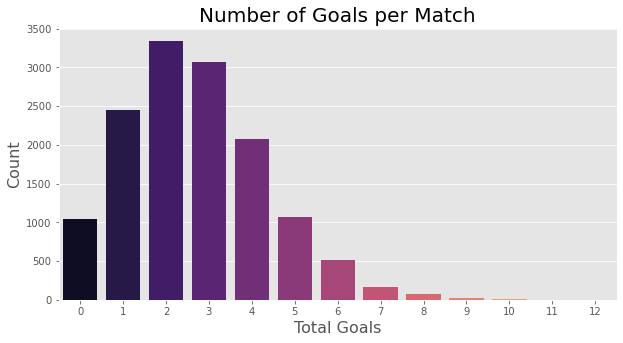

,goals_h,goals_a,total_goals
count,13853.000000,13853.000000,13853.000000
mean,1.508915,1.178950,2.687865
std,1.306599,1.152825,1.663557
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,1.000000,3.000000
75%,2.000000,2.000000,4.000000
max,10.000000,9.000000,12.000000


In [6]:
# Plotting total goals per match distribution

data['total_goals'] = data['goals_h'] + data['goals_a']

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['total_goals'], palette = 'magma')
plt.title('Number of Goals per Match', fontsize = 20)
plt.xlabel('Total Goals', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

data[['goals_h', 'goals_a', 'total_goals']].describe()


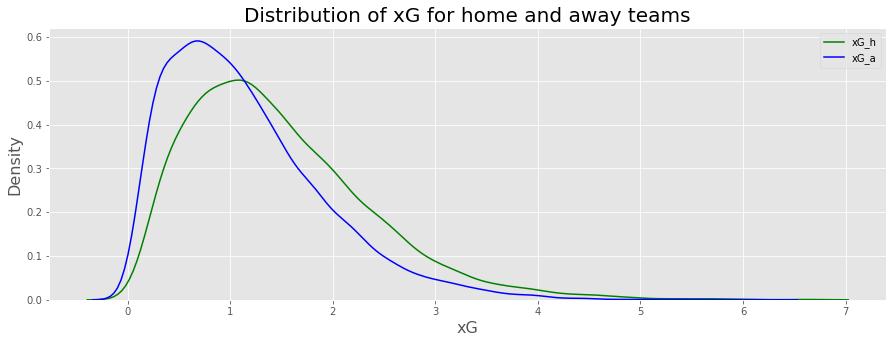

In [7]:
# Comparing distribution of xG of teams playing home and away

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['xG_h'], color = 'green', hist = False)
sns.distplot(data['xG_a'], color = 'blue', hist = False)
plt.xlabel('xG', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.title('Distribution of xG for home and away teams', fontsize = 20)
plt.legend(['xG_h', 'xG_a'])
plt.show()

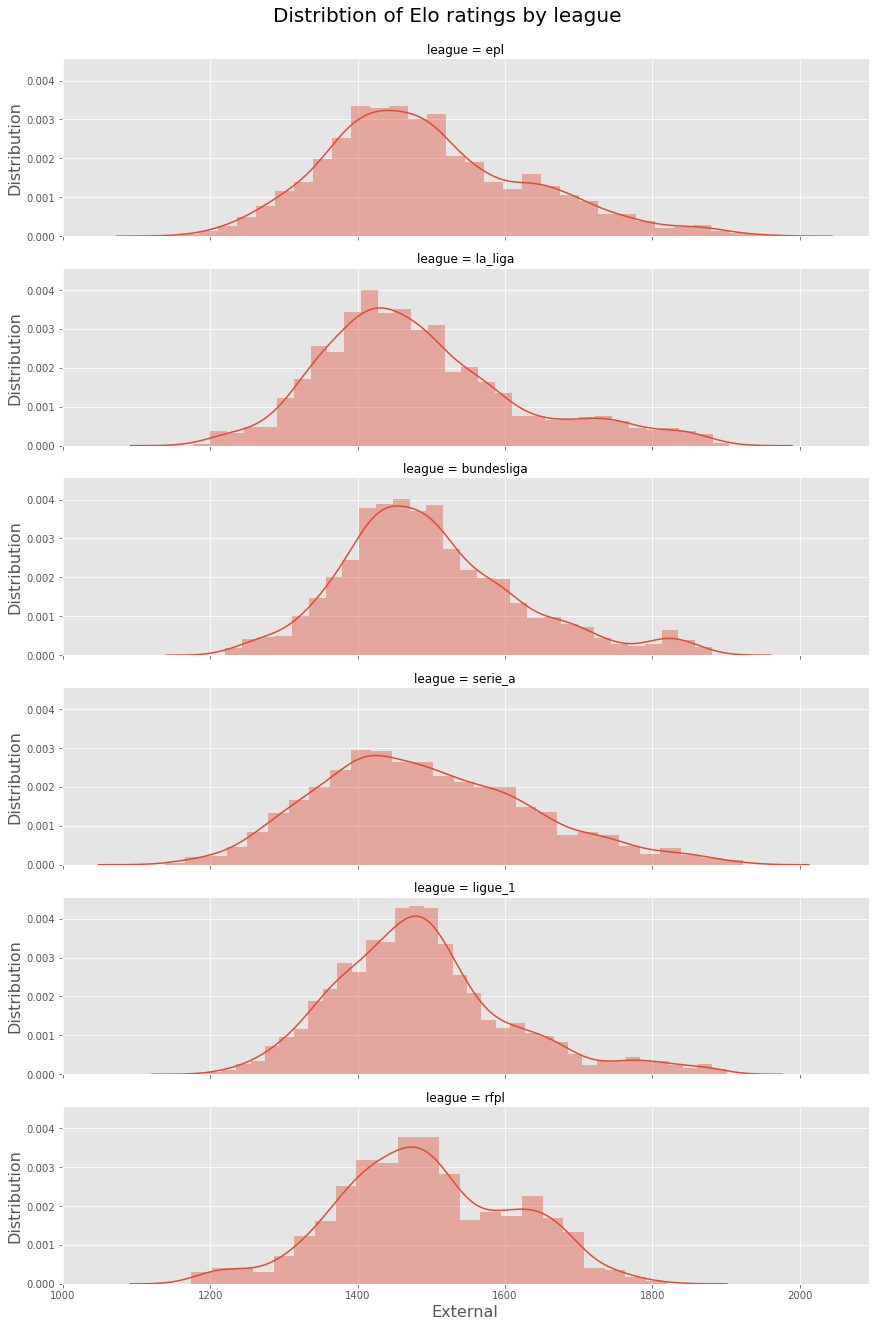

In [8]:
# Plotting distribution of team elo ratings by league

g = sns.FacetGrid(data, row="league", aspect=4)
g.map(sns.distplot, "elo_h")

for i in range (0, len(g.axes)):
    g.axes[i,0].set_ylabel('Distribution', fontsize = 16)
    
g.axes[i,0].set_xlabel("External", fontsize = 16)
g.fig.suptitle("Distribtion of Elo ratings by league", y=1.02, fontsize = 20)
plt.show()

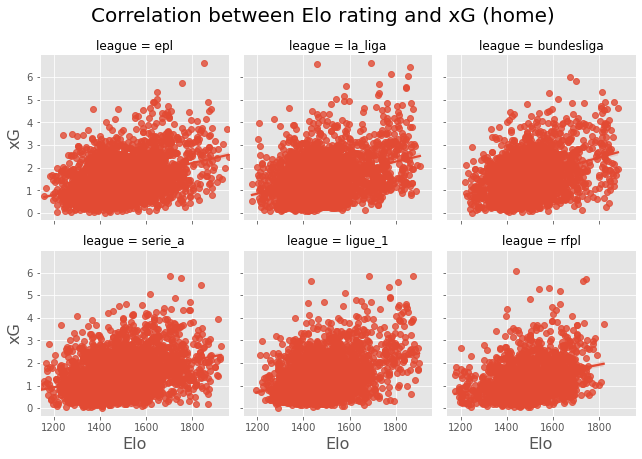

In [9]:
# Plotting scatter plot between Elo (home team) and xG (home team) by league

g = sns.FacetGrid(data, col="league", col_wrap=3)
g.map(sns.regplot, "elo_h", "xG_h")
g.fig.suptitle("Correlation between Elo rating and xG (home)", y=1.05, fontsize = 20)
for i in range (0, len(g.axes), 3):
    g.axes[i].set_ylabel('xG', fontsize = 16)
for i in range (3, len(g.axes), 1):
    g.axes[i].set_xlabel('Elo', fontsize = 16)
plt.show()

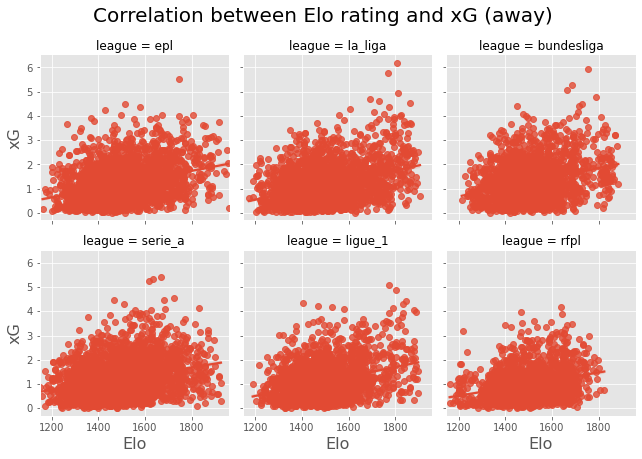

In [10]:
# Plotting scatter plot between Elo (away team) and xG (away team) by league

g = sns.FacetGrid(data, col="league", col_wrap=3)
g.map(sns.regplot, "elo_a", "xG_a")
g.fig.suptitle("Correlation between Elo rating and xG (away)", y=1.05, fontsize = 20)
for i in range (0, len(g.axes), 3):
    g.axes[i].set_ylabel('xG', fontsize = 16)
for i in range (3, len(g.axes), 1):
    g.axes[i].set_xlabel('Elo', fontsize = 16)
plt.show()

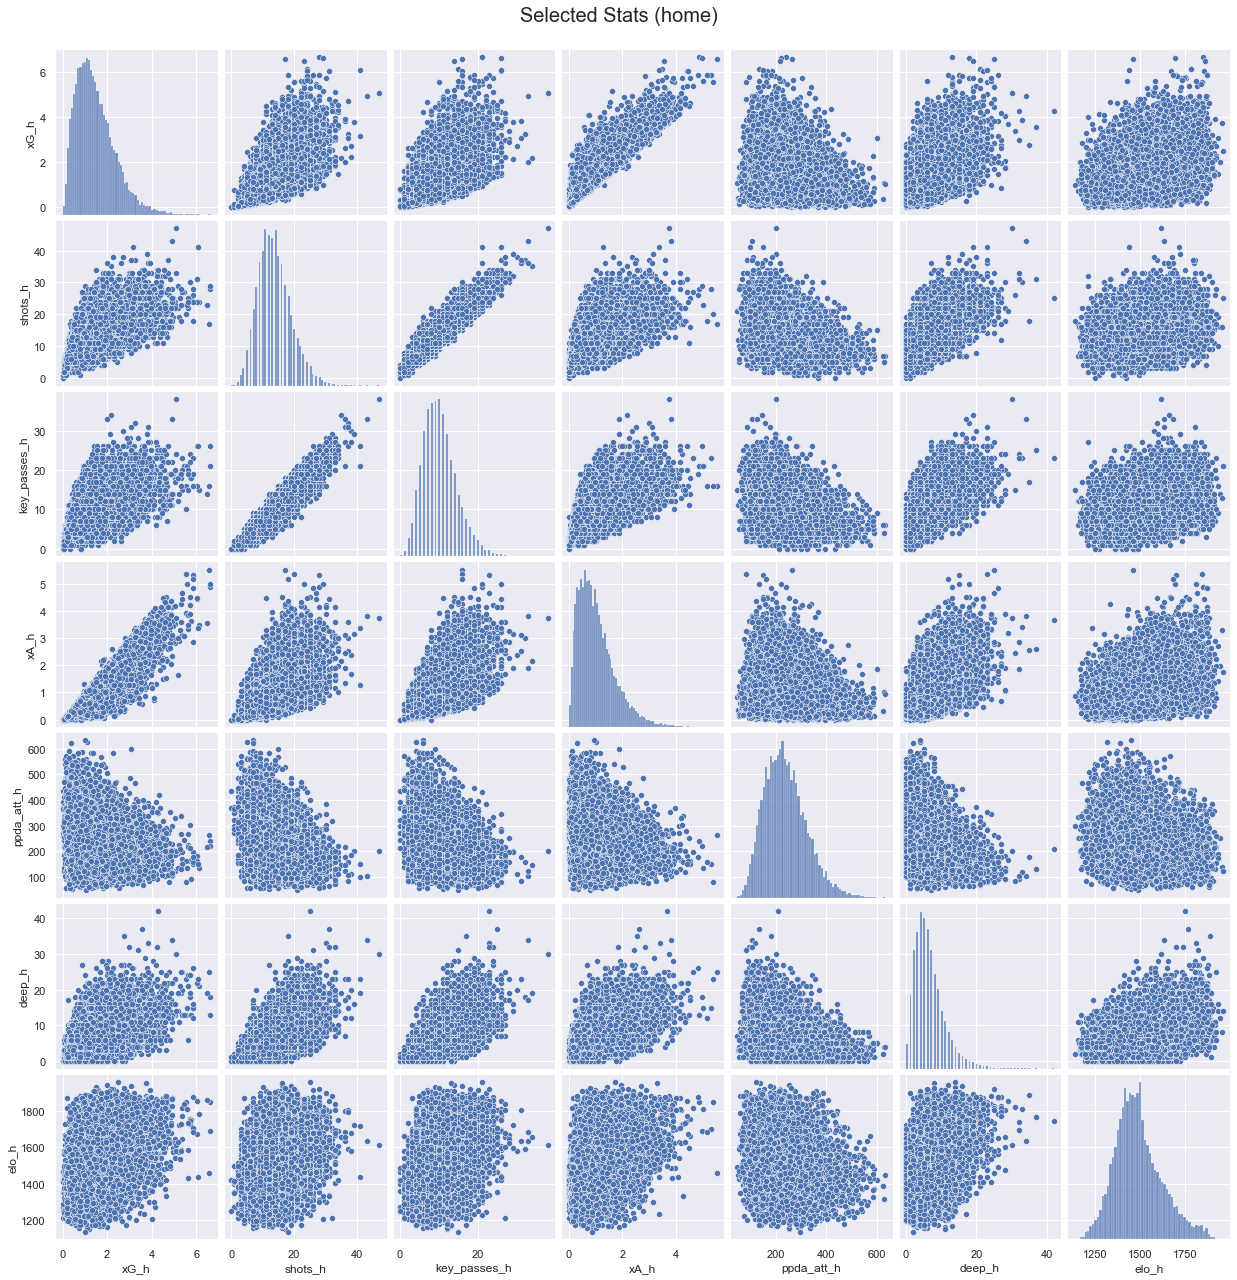

In [11]:
# Plotting pairplot for selected home team stats

sns.set()
cols = ['xG_h', 'shots_h', 'key_passes_h', 'xA_h', 'ppda_att_h', 'deep_h', 'elo_h']
g = sns.pairplot(data[cols], size = 2.5)
g.fig.suptitle("Selected Stats (home)", y=1.02, fontsize = 20)
plt.show()

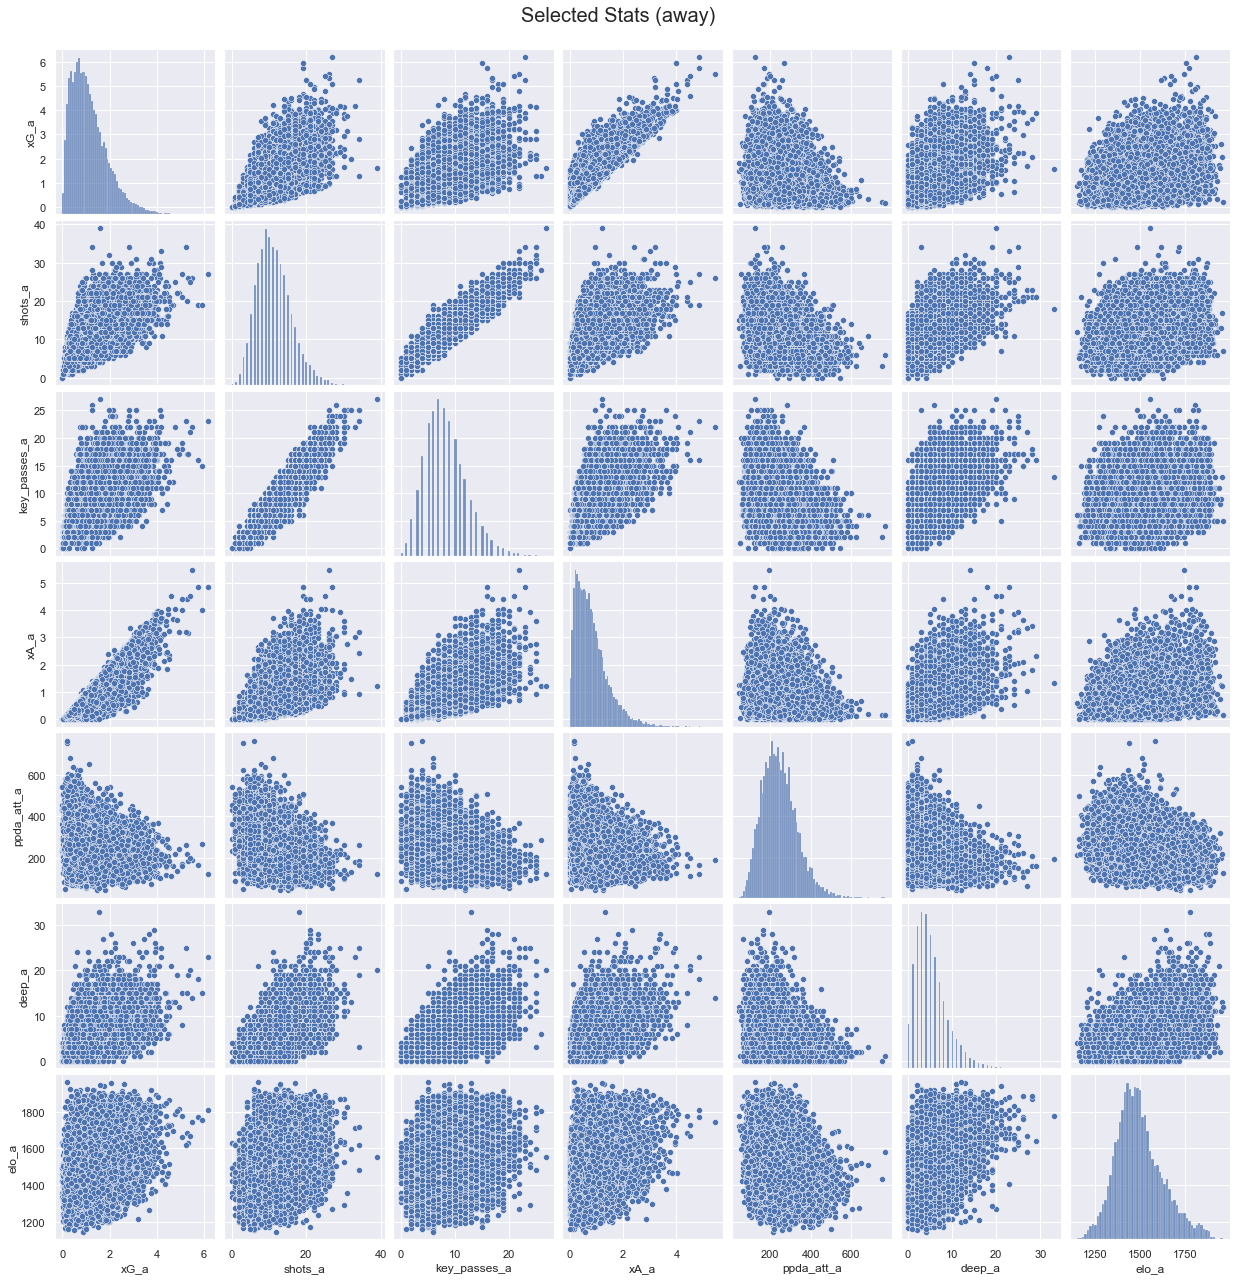

In [12]:
# Plotting pairplot for selected away team stats

sns.set()
cols = ['xG_a', 'shots_a', 'key_passes_a', 'xA_a', 'ppda_att_a', 'deep_a', 'elo_a']
g = sns.pairplot(data[cols], size = 2.5)
g.fig.suptitle("Selected Stats (away)", y=1.02, fontsize = 20)
plt.show()

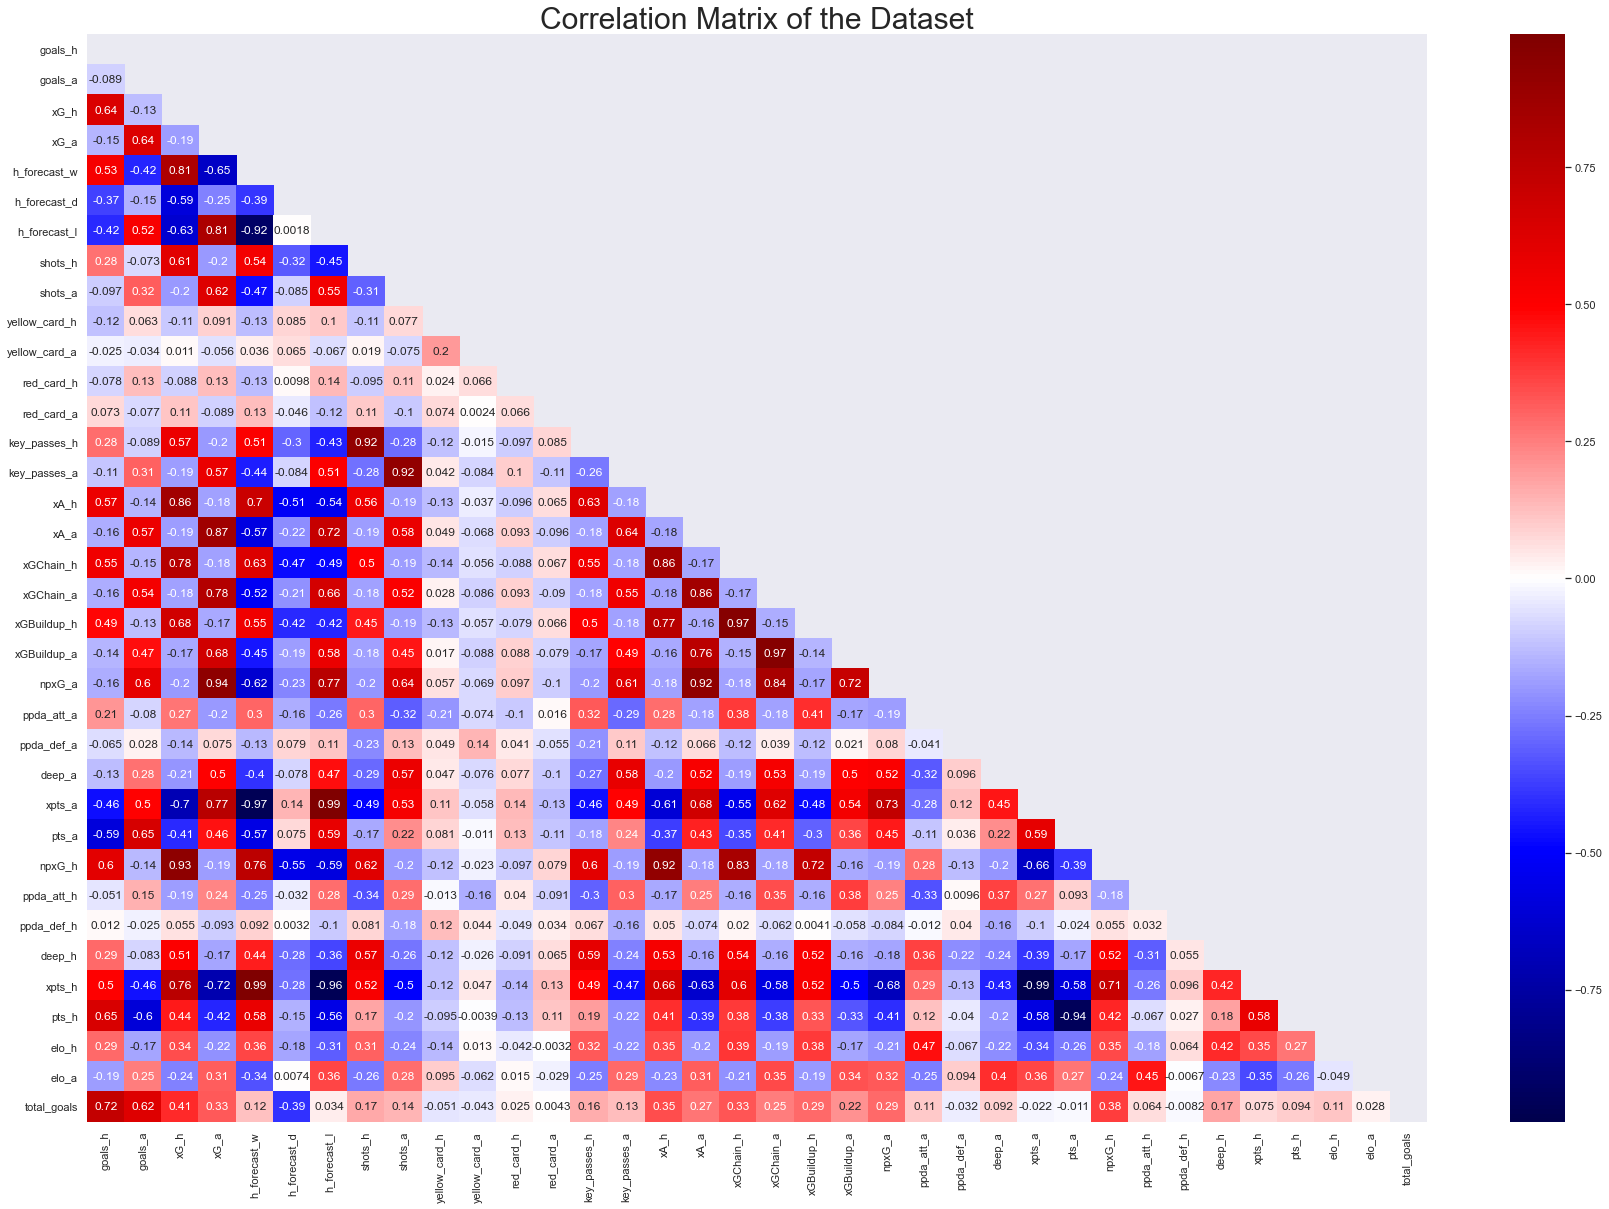

In [13]:
# Plotting correlation matrix for all the features in the dataset 

mask = np.triu(np.ones_like(data.drop(['id', 'isResult', 'datetime', 'team_h', 
                       'team_a', 'id_h', 'id_a', 'league', 'match_id'], axis=1).corr(), dtype=np.bool))

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data.drop(['id', 'isResult', 'datetime', 'team_h', 
                       'team_a', 'id_h', 'id_a', 'league', 'match_id'], axis=1).corr(), mask = mask, annot = True, cmap='seismic')

plt.title('Correlation Matrix of the Dataset', fontsize = 30)
plt.show()

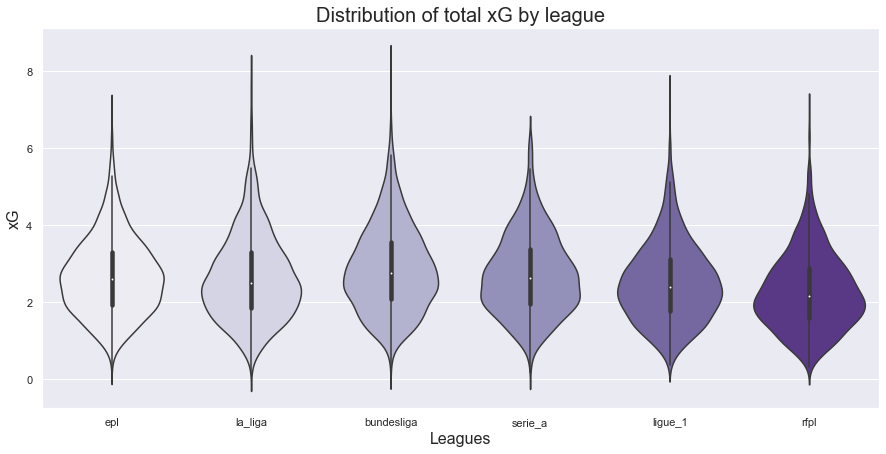

In [14]:
# Plotting distribution of xG by league

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data['league'], y = data['xG_h']+data['xG_a'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Leagues', fontsize = 16)
ax.set_ylabel(ylabel = 'xG', fontsize = 16)
ax.set_title(label = 'Distribution of total xG by league', fontsize = 20)
plt.show()

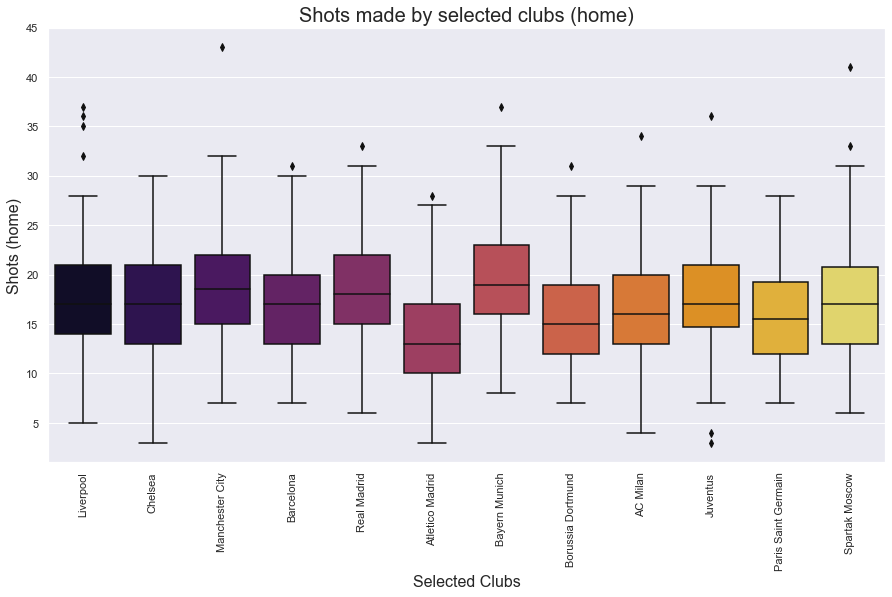

In [15]:
# Plotting shots made by some popular teams (home)

some_clubs = ('AC Milan', 'Atletico Madrid', 'Barcelona', 'Bayern Munich', 'Borussia Dortmund', 'Chelsea',
             'Juventus', 'Liverpool', 'Manchester City', 'Paris Saint Germain', 'Real Madrid', 'Spartak Moscow')

data_shots = data.loc[data['team_h'].isin(some_clubs) & data['shots_h']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_shots['team_h'], y = data_shots['shots_h'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Selected Clubs', fontsize = 16)
ax.set_ylabel(ylabel = 'Shots (home)', fontsize = 16)
ax.set_title(label = 'Shots made by selected clubs (home)', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

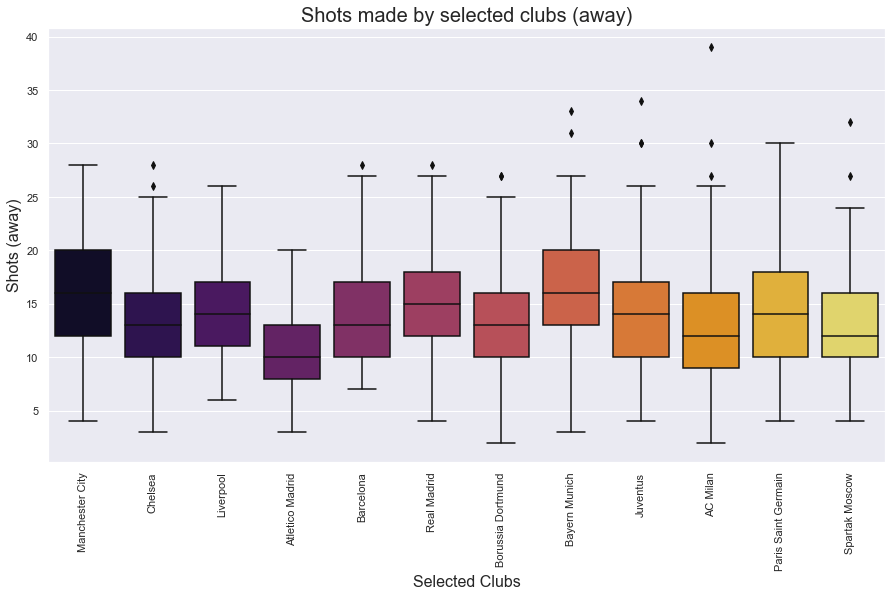

In [16]:
# Plotting shots made by some popular teams (away)

some_clubs = ('AC Milan', 'Atletico Madrid', 'Barcelona', 'Bayern Munich', 'Borussia Dortmund', 'Chelsea',
             'Juventus', 'Liverpool', 'Manchester City', 'Paris Saint Germain', 'Real Madrid', 'Spartak Moscow')

data_shots = data.loc[data['team_a'].isin(some_clubs) & data['shots_a']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_shots['team_a'], y = data_shots['shots_a'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Selected Clubs', fontsize = 16)
ax.set_ylabel(ylabel = 'Shots (away)', fontsize = 16)
ax.set_title(label = 'Shots made by selected clubs (away)', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

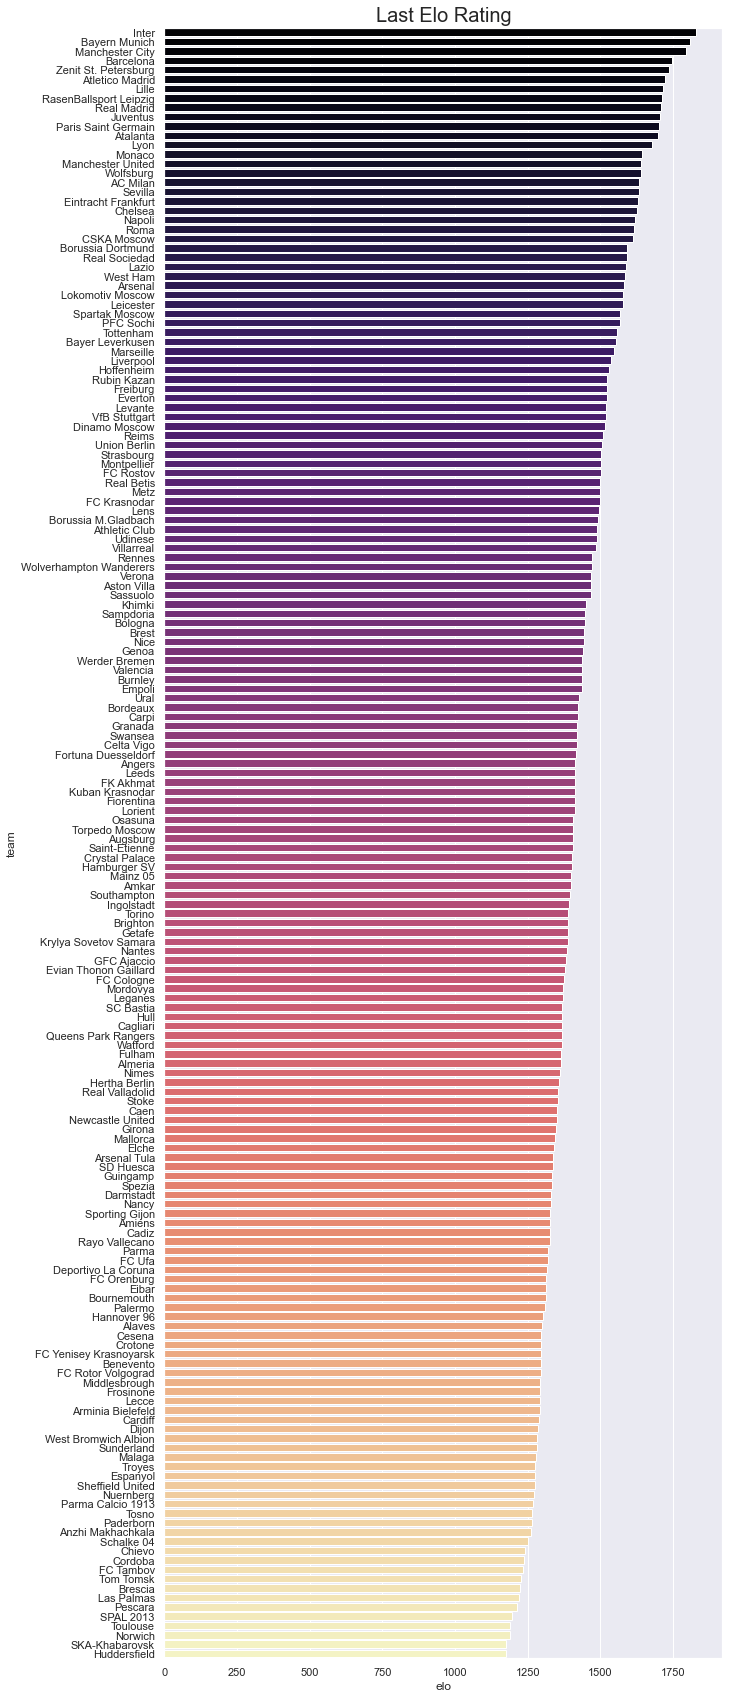

In [17]:
# Plotting last elo rating of a team

temp = data[['datetime', 'team_h', 'elo_h']]
temp2 = data[['datetime', 'team_a', 'elo_a']]

g = temp.groupby('team_h')
g2 = temp2.groupby('team_a')

temp = g.tail(1).drop_duplicates().sort_values('team_h').reset_index(drop=True)
temp2 = g2.tail(1).drop_duplicates().sort_values('team_a').reset_index(drop=True)

temp.columns = ['datetime', 'team', 'elo']
temp2.columns = ['datetime', 'team', 'elo']

temp = pd.concat([temp, temp2], ignore_index=True)
g = temp.groupby('team')
temp = g.tail(1).drop_duplicates().sort_values('elo', ascending=False).reset_index(drop=True)

plt.rcParams['figure.figsize'] = (10, 30)
sns.barplot(x="elo", y="team", data=temp, palette = 'magma')
plt.title('Last Elo Rating', fontsize = 20)
plt.show()

In [18]:
# Listing the games with most total goals (10+)

temp=data[['datetime', 'team_h', 'team_a', 'goals_h', 'goals_a', 'total_goals']].sort_values('total_goals', ascending=False)
temp[temp['total_goals']>=10].style.background_gradient('Blues')

,datetime,team_h,team_a,goals_h,goals_a,total_goals
534,2015-12-20 19:00:00,Real Madrid,Rayo Vallecano,10,2,12
1377,2020-06-19 17:00:00,PFC Sochi,FC Rostov,10,1,11
31,2014-09-20 15:00:00,Deportivo La Coruna,Real Madrid,2,8,10
764,2016-08-21 00:15:00,Sevilla,Espanyol,6,4,10
1547,2018-09-02 16:30:00,Barcelona,SD Huesca,8,2,10
307,2015-09-20 14:30:00,Mordovya,CSKA Moscow,4,6,10
285,2015-04-05 11:00:00,Real Madrid,Granada,9,1,10
379,2015-05-23 19:30:00,Real Madrid,Getafe,7,3,10
1108,2017-05-07 14:00:00,Lazio,Sampdoria,7,3,10
4,2014-08-03 13:30:00,Dinamo Moscow,FC Rostov,7,3,10
